In [1]:
def read_data(filename):
    with open(filename, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
    return data

In [2]:
train_data = read_data('ratings_train.txt')

In [3]:
test_data = read_data('ratings_test.txt')

In [4]:
print(len(train_data))

150000


In [5]:
print(len(train_data[0]))
print(len(test_data))
print(len(test_data[0]))

3
50000
3


In [6]:
from konlpy.tag import Twitter

In [7]:
pos_tagger = Twitter()

In [8]:
def tokenize(doc):
    # norm, stem은 optional
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [9]:
train_docs = [(tokenize(row[1]),row[2]) for row in train_data]
test_docs = [(tokenize(row[1]),row[2]) for row in test_data]

In [10]:
from pprint import pprint

In [11]:
pprint(train_docs[0])

(['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증/Noun',
  '나다/Verb',
  '목소리/Noun'],
 '0')


In [12]:
tokens = [t for d in train_docs for t in d[0]]

In [13]:
print(len(tokens))

2194536


In [14]:
import nltk

In [15]:
text = nltk.Text(tokens, name='NMSC')

In [16]:
print(text)

<Text: NMSC>


In [17]:
print(len(set(text.tokens)))

48765


In [18]:
pprint(text.vocab().most_common(10))

[('./Punctuation', 68630),
 ('영화/Noun', 51365),
 ('하다/Verb', 50281),
 ('이/Josa', 39123),
 ('보다/Verb', 34764),
 ('의/Josa', 30480),
 ('../Punctuation', 29055),
 ('에/Josa', 27108),
 ('가/Josa', 26696),
 ('을/Josa', 23481)]


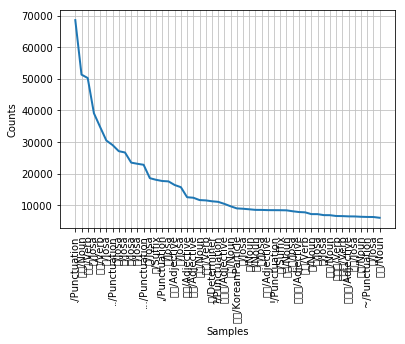

In [19]:
text.plot(50)

In [21]:
# 위 도표 폰트문제 해결
from matplotlib import font_manager, rc
font_fname = './Library/Fonts/AppleGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family = font_name)

FileNotFoundError: [Errno 2] No such file or directory: './Library/Fonts/AppleGothic.ttf'

In [20]:
text.collocations()

이/Determiner 것/Noun; 적/Suffix 인/Josa; 이/Determiner 거/Noun; 안/Noun
되다/Verb; 것/Noun 은/Josa; 10/Number 점/Noun; 배우/Noun 들/Suffix; 수/Noun
있다/Adjective; 이/Noun 게/Josa; 내/Noun 가/Josa; 최고/Noun 의/Josa; 네/Suffix
요/Josa; 이/Noun 영화/Noun; 끝/Noun 까지/Josa; 들/Suffix 이/Josa; 봐/Noun
도/Josa; 때문/Noun 에/Josa; 적/Suffix 으로/Josa; 사람/Noun 들/Suffix; 영화/Noun
를/Josa


In [22]:
selected_words = [f[0] for f in text.vocab().most_common(2000)]

In [23]:
def term_exists(doc):
    return {'exists({})'.format(word): (word in set(doc)) for word in selected_words}

In [24]:
# 시간 단축을 위한 꼼수로 training corpus의 일부만 사용할 수 있음

In [25]:
train_docs = train_docs[:10000]

In [26]:
train_xy = [(term_exists(d),c) for d, c in train_docs]
test_xy = [(term_exists(d),c) for d, c in test_docs]

In [28]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)
print(nltk.classify.accuracy(classifier, test_xy))

0.80408
